In [1]:
import warnings;
warnings.simplefilter('ignore')

In [9]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('TP')

In [24]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1231,2022-05-09,236.500000,223.050003,235.000000,230.000000,60959066.0,230.000000
1232,2022-05-10,234.500000,220.649994,229.949997,222.149994,30274946.0,222.149994
1233,2022-05-11,229.800003,219.500000,222.800003,226.500000,35097575.0,226.500000
1234,2022-05-12,227.050003,217.050003,225.800003,219.050003,29320356.0,219.050003
1235,2022-05-13,229.199997,221.300003,225.000000,222.800003,33099873.0,222.800003


In [5]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

<AxesSubplot:>

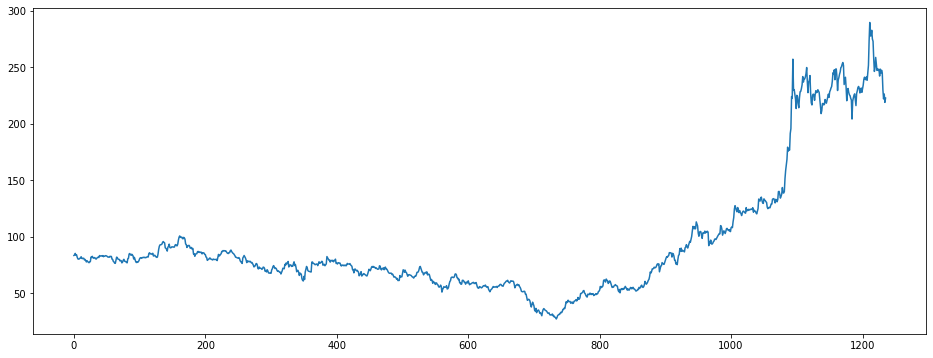

In [10]:
plt.figure(figsize=(16,6))
df['Close'].plot()

In [11]:
data = df[['Date', 'Close']]

In [12]:
data.head()

,Date,Close
0,2017-05-15,83.550003
1,2017-05-16,83.849998
2,2017-05-17,85.349998
3,2017-05-18,83.750000
4,2017-05-19,84.150002


In [13]:
data.columns = ['ds','y']

In [38]:
data.tail()

,ds,y
1231,2022-05-09,230.000000
1232,2022-05-10,222.149994
1233,2022-05-11,226.500000
1234,2022-05-12,219.050003
1235,2022-05-13,222.800003


In [15]:
len(data)

1236

In [33]:
# Training  Model
m= Prophet(daily_seasonality=True)
model = m.fit(df_train)


In [34]:
future = model.make_future_dataframe(periods=150)

In [35]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-15,82.172751,74.076155,85.355063,82.172751,82.172751,-2.437573,-2.437573,-2.437573,-2.60805,-2.60805,-2.60805,1.336199,1.336199,1.336199,-1.165722,-1.165722,-1.165722,0.0,0.0,0.0,79.735178
1,2017-05-16,82.206856,74.054649,85.870065,82.206856,82.206856,-2.330379,-2.330379,-2.330379,-2.60805,-2.60805,-2.60805,1.284202,1.284202,1.284202,-1.006530,-1.006530,-1.006530,0.0,0.0,0.0,79.876477
2,2017-05-17,82.240961,74.282435,85.743869,82.240961,82.240961,-2.264077,-2.264077,-2.264077,-2.60805,-2.60805,-2.60805,1.182349,1.182349,1.182349,-0.838375,-0.838375,-0.838375,0.0,0.0,0.0,79.976884
3,2017-05-18,82.275066,74.468876,86.079414,82.275066,82.275066,-2.231008,-2.231008,-2.231008,-2.60805,-2.60805,-2.60805,1.042073,1.042073,1.042073,-0.665031,-0.665031,-0.665031,0.0,0.0,0.0,80.044057
4,2017-05-19,82.309170,74.445914,85.781333,82.309170,82.309170,-1.871907,-1.871907,-1.871907,-2.60805,-2.60805,-2.60805,1.226528,1.226528,1.226528,-0.490385,-0.490385,-0.490385,0.0,0.0,0.0,80.437263


In [36]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1145,2021-10-25,135.719436,122.346632,137.470190,130.635640,140.476784,-5.530984,-5.530984,-5.530984,-2.60805,-2.60805,-2.60805,1.336199,1.336199,1.336199,-4.259133,-4.259133,-4.259133,0.0,0.0,0.0,130.188452
1146,2021-10-26,135.908885,122.611113,137.337791,130.786174,140.738160,-5.499308,-5.499308,-5.499308,-2.60805,-2.60805,-2.60805,1.284202,1.284202,1.284202,-4.175460,-4.175460,-4.175460,0.0,0.0,0.0,130.409576
1147,2021-10-27,136.098334,122.885814,138.134916,130.936437,140.992623,-5.535511,-5.535511,-5.535511,-2.60805,-2.60805,-2.60805,1.182349,1.182349,1.182349,-4.109809,-4.109809,-4.109809,0.0,0.0,0.0,130.562823
1148,2021-10-28,136.287783,122.435292,138.335289,131.079286,141.224148,-5.627513,-5.627513,-5.627513,-2.60805,-2.60805,-2.60805,1.042073,1.042073,1.042073,-4.061536,-4.061536,-4.061536,0.0,0.0,0.0,130.660269
1149,2021-10-29,136.477232,123.307908,139.033883,131.224238,141.519358,-5.410871,-5.410871,-5.410871,-2.60805,-2.60805,-2.60805,1.226528,1.226528,1.226528,-4.029349,-4.029349,-4.029349,0.0,0.0,0.0,131.066361


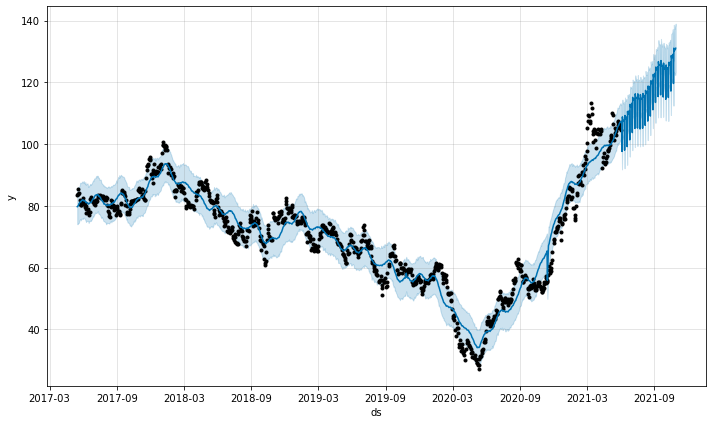

In [37]:
fig1= model.plot(forecast)

In [39]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-05-15,79.735178
1,2017-05-16,79.876477
2,2017-05-17,79.976884
3,2017-05-18,80.044057
4,2017-05-19,80.437263
...,...,...
1145,2021-10-25,130.188452
1146,2021-10-26,130.409576
1147,2021-10-27,130.562823
1148,2021-10-28,130.660269


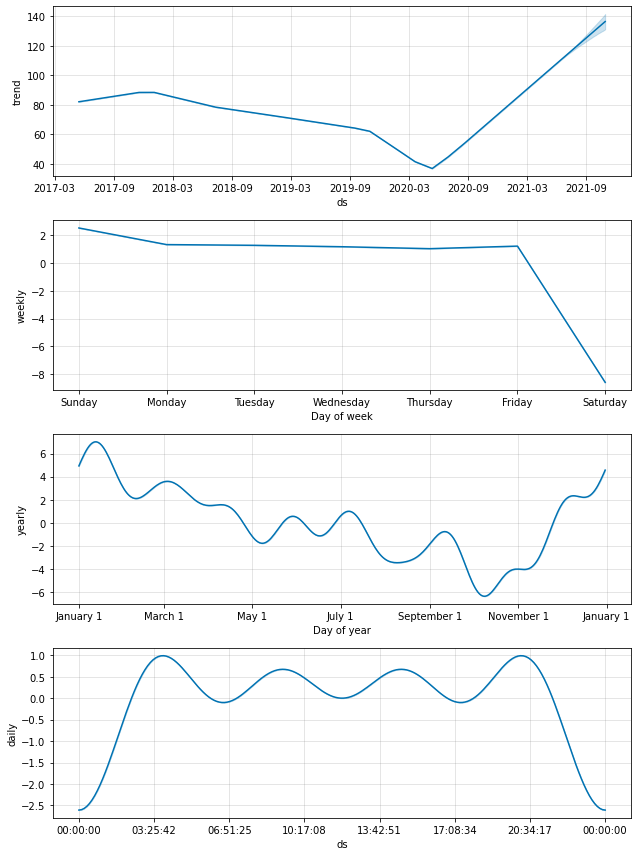

In [40]:
plot = m.plot_components(forecast)

In [42]:
# Cross Validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,period='75 days', horizon='150 days')
df_cv.head()

INFO:fbprophet:Making 12 forecasts with cutoffs between 2018-09-30 00:00:00 and 2021-01-02 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-10-01,70.472556,68.194024,72.986605,67.949997,2018-09-30
1,2018-10-03,70.118358,67.655202,72.551211,67.500000,2018-09-30
2,2018-10-04,70.070584,67.605437,72.724404,66.849998,2018-09-30
3,2018-10-05,70.309430,67.918198,72.774546,62.849998,2018-09-30
4,2018-10-08,71.363987,68.717434,73.761399,61.500000,2018-09-30


In [43]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1208,2021-05-26,79.255777,72.425098,85.755600,106.099998,2021-01-02
1209,2021-05-27,79.469806,73.051207,85.991388,106.349998,2021-01-02
1210,2021-05-28,79.821301,73.071744,85.916255,105.349998,2021-01-02
1211,2021-05-31,80.483887,74.436750,86.822559,106.449997,2021-01-02
1212,2021-06-01,80.406970,73.962838,87.081128,104.650002,2021-01-02


In [46]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,671.391974,25.911233,22.029104,0.348575,0.295005,0.041322
132,147 days,682.071620,26.116501,22.064916,0.346948,0.295005,0.041322
133,148 days,691.836257,26.302780,22.238894,0.349156,0.295914,0.041322
134,149 days,696.535756,26.391964,22.316964,0.348599,0.295914,0.041322
135,150 days,693.099910,26.326791,22.136330,0.346477,0.293802,0.041322


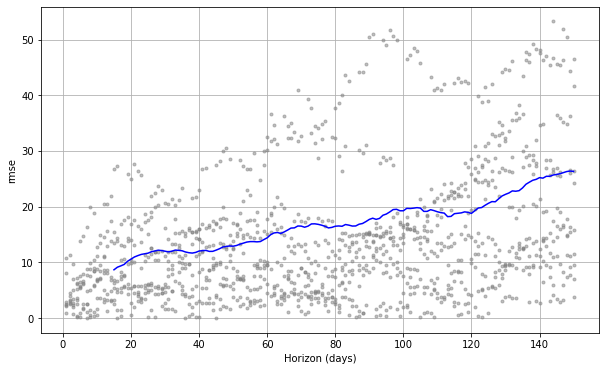

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')